# Table of contents
1. [Libraries](#libraries)
2. [Questions](#quesions)
    - [2.1 Question 1](#question1)
        - [2.1.1 Preprocessing](#preprocessing1)
        - [2.1.2 Analysis](#analysis1)
        - [2.1.3 Conclusion](#conclusion1)
    - [2.2 Question 2](#question2)
        - [2.2.1 Preprocessing](#preprocessing2)
        - [2.2.2 Analysis](#analysis2)
        - [2.2.3 Conclusion](#conclusion2)
    - [2.3 Question 3](#question3)
        - [2.3.1 Preprocessing](#preprocessing3)
        - [2.3.2 Analysis](#analysis3)
        - [2.3.3 Conclusion](#conclusion3)
    - [2.4 Question 4](#question4)
        - [2.4.1 Preprocessing](#preprocessing4)
        - [2.4.2 Analysis](#analysis4)
        - [2.4.3 Conclusion](#conclusion4)
    - [2.5 Question 5](#question5)
        - [2.5.1 Preprocessing](#preprocessing5)
        - [2.5.2 Analysis](#analysis5)
        - [2.5.3 Conclusion](#conclusion5)



<h1 id = "libraries"> 1. Libraries </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/preprocessed_data.csv')
data

,Title,Tomatoes CriticScore,Tomatoes UserScore,Cast,Director,Genre,Rating,Studio,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Metascore,Meta UserScore
0,L.A. Confidential,99.000000,94.00000,"['Kevin Spacey', 'Russell Crowe', 'Guy Pearce'...",['Curtis Hanson'],"['Crime', 'Drama']",R,Warner Home Vídeo,1997-09-19,35000000.0,64604977.0,1.262050e+08,91.0000,86.000000
1,The Godfather,97.000000,98.00000,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola'],"['Crime', 'Drama']",R,Paramount Pictures,1972-03-15,7000000.0,136479994.0,2.700074e+08,100.0000,93.000000
2,Casablanca,99.000000,95.00000,"['Humphrey Bogart', 'Ingrid Bergman', 'Paul He...",['Michael Curtiz'],['Drama'],PG,Warner Bros. Pictures,1943-01-23,1039000.0,10462500.0,1.056718e+07,100.0000,87.000000
3,Parasite,99.000000,90.00000,"['Song Kang-ho', 'Lee Sun-kyun', 'Jo Yeo-jeong...",['Bong Joon Ho'],"['Comedy', 'Mystery & Thriller', 'Drama']",R,Neon,2019-05-30,11800000.0,53369745.0,2.532679e+08,97.0000,89.000000
4,Top Gun: Maverick,96.000000,99.00000,"['Tom Cruise', 'Miles Teller', 'Jennifer Conne...",['Joseph Kosinski'],"['Action', 'Adventure']",PG-13,Paramount Pictures,2022-05-20,170000000.0,718732821.0,1.464400e+09,78.0000,84.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,Antarctic Edge: 70 South,57.000000,50.00000,"['Dena Seidel', 'Richard Ludescher', 'Dena Sei...",['Dena Seidel'],"['Documentary', 'Adventure']",Unknown,First Run,2015-04-17,150000.0,7193.0,7.193000e+03,62.0000,67.400000
5102,8 Days to Hell,58.367886,62.45744,"['Eric Roberts', 'Shane Woodson', 'Drew Hale',...",['Shane Woodson'],['Horror'],Unknown,Pegasus Flying Films,2021-07-30,100000.0,0.0,0.000000e+00,55.6051,64.939799
5103,20 Dates,35.000000,47.00000,"['Myles Berkowitz', 'Elisabeth Wagner', 'Richa...",['Myles Berkowitz'],"['Comedy', 'Romance']",R,Fox,1999-02-26,66000.0,541636.0,6.029200e+05,35.0000,56.400000
5104,Happy 40th,58.367886,62.45744,"['Fernando Acosta', 'Jenni Blong', 'Robyn Cohe...",['Madoka Raine'],['Drama'],Unknown,English,2015-03-01,35000.0,0.0,0.000000e+00,55.6051,64.939799


<h1 id = "questions"> 2. Questions </h1>

<h2 id = "question1"> 2.1 Question 1 </h2>

**A Question:** 
What are the primary factors influencing critic and user scores?

**Answering this question will help us:**
- Identify key attributes that contribute to the success or failure of a movie.
- Provide actionable insights for filmmakers to focus on elements that resonate with audiences and critics.
- Guide marketing strategies by highlighting factors that improve reception, such as popular genres or directors.

**How to answer:**
    
- This question seeks to identify the key variables or attributes that impact how critics and users rate movies. Factors may include:
    - **Genre:** Determine if certain genres, such as drama or thriller, are more critically acclaimed.
    - **Production Budget:** Explore whether higher budgets correlate with better ratings.
    - **Release Time:** Assess seasonal trends, such as whether movies released during holidays tend to score higher.
    - **Marketing and Promotion:** Examine if heavily marketed movies receive higher initial ratings.



<h3 id = "preprocessing1">2.1.1 Preprocessing </h3>

In [3]:
import ast
import pandas as pd

data_q1 = data.copy()

# Dealing with the Genre column
data_q1['Genre'] = data_q1['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else None)

# Drop rows where Genre could not be converted to a list
data_q1 = data_q1.dropna(subset=['Genre'])

# One-hot encode the Genre column
data_q1 = data_q1.drop('Genre', axis=1).join(data_q1['Genre'].str.join('|').str.get_dummies())

# Split release date into year, month and day
data_q1['Release Date'] = pd.to_datetime(data_q1['Release Date'])
data_q1['Release Year'] = data_q1['Release Date'].dt.year
data_q1['Release Month'] = data_q1['Release Date'].dt.month
# Drop the original Release Date column
data_q1 = data_q1.drop('Release Date', axis=1)

# Calculate the mean score for each movie
data_q1['Mean UserScore'] = data_q1[['Tomatoes UserScore', 'Meta UserScore']].mean(axis=1)
data_q1 = data_q1.drop(['Tomatoes UserScore', 'Meta UserScore'], axis=1)
data_q1['Mean CriticScore'] = data_q1[['Tomatoes CriticScore', 'Metascore']].mean(axis=1)
data_q1 = data_q1.drop(['Tomatoes CriticScore', 'Metascore'], axis=1)

# One-hot encode the Rating column
data_q1 = data_q1.drop('Rating', axis=1).join(data_q1['Rating'].str.get_dummies())

# Drop columns that are not needed
data_q1 = data_q1.drop(['Title', 'Director','Cast', 'Studio'], axis=1)

<h3 id = "analysis1">2.1.2 Analysis </h3>

- Correlation score with genre

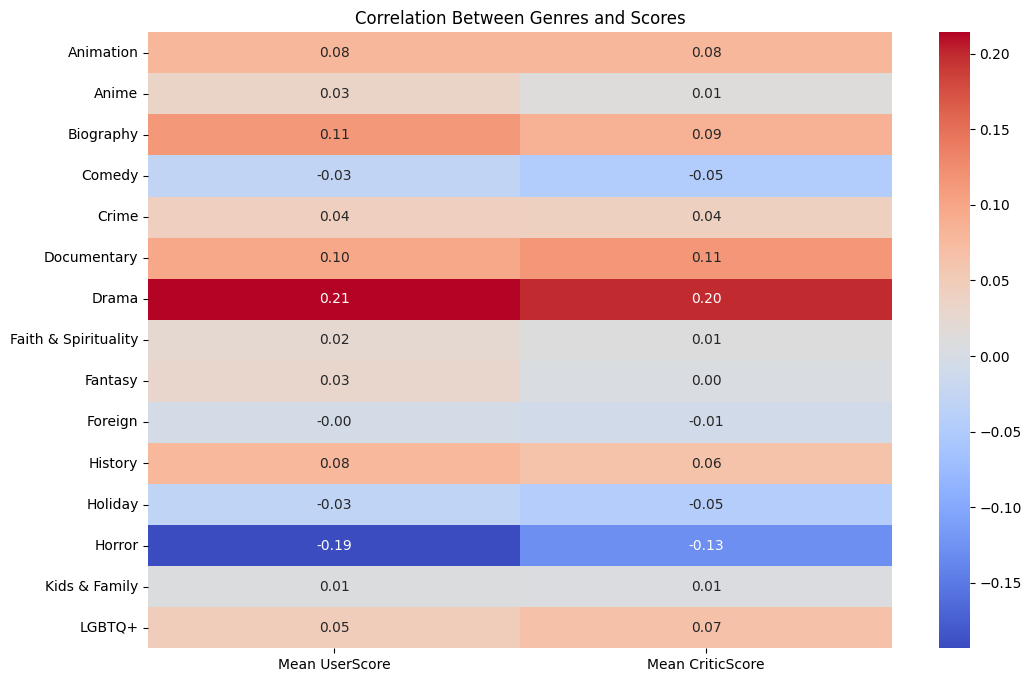

In [4]:
# Ensure genre_columns and scores_columns exist and are numeric
genre_columns = data_q1.columns[5:20]  # Replace with actual genre column range
scores_columns = ['Mean UserScore', 'Mean CriticScore']

# Check data types of selected columns
numeric_columns = genre_columns.tolist() + scores_columns
data_numeric = data_q1[numeric_columns].select_dtypes(include='number')

# Calculate correlations
genre_scores_correlation = data_numeric.corr()

# Extract only genre vs. score correlations
genre_scores_correlation = genre_scores_correlation.loc[genre_columns, scores_columns]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_scores_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Genres and Scores")
plt.show()


Key Observations:

1. Strong Positive Correlations:

    - **Drama:** This genre exhibits the strongest positive correlation with both user and critic scores, indicating that dramas are generally well-received by both audiences and critics.
    - **Documentary:** Documentaries also show a strong positive correlation, suggesting that they are often considered informative and engaging.

2. Weak or Negative Correlations:

    - **Horror:** This genre has a strong negative correlation with both user and critic scores, suggesting that horror films, while popular with certain audiences, are often not as well-regarded by critics.
    - **Comedy:** While not as pronounced as horror, comedy shows a weak negative correlation, indicating that it might be more challenging to consistently deliver critically acclaimed comedies.

3. Mixed Correlations:

    - **Animation:** Animation has a moderate positive correlation with user scores but a weaker correlation with critic scores, suggesting that animated films are often popular with audiences but may not always receive high critical acclaim.
    - **Biography:** This genre shows a strong positive correlation with user scores but a weaker correlation with critic scores, indicating that biographical films may be popular with audiences but might not always be considered critically significant.

- Correlation with Production Budget and Gross


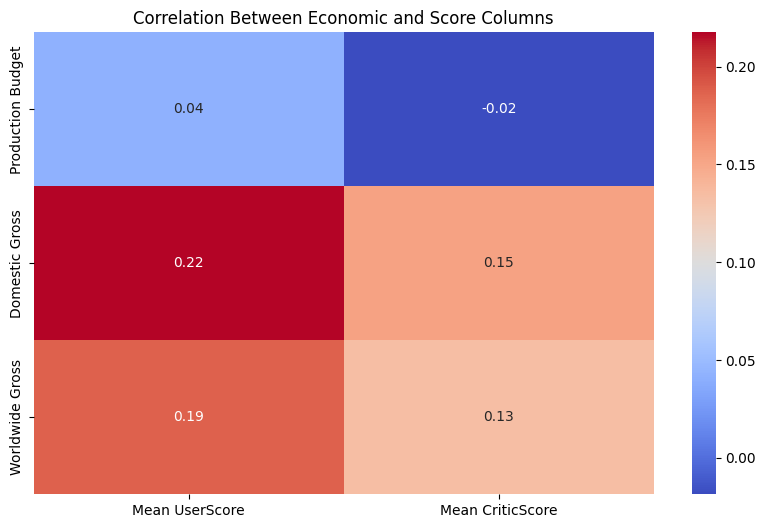

In [5]:
# Define economic and score columns
economic_columns = ['Production Budget', 'Domestic Gross', 'Worldwide Gross']
scores_columns = ['Mean UserScore', 'Mean CriticScore']

# Ensure columns are numeric
numeric_columns = economic_columns + scores_columns
data_numeric = data_q1[numeric_columns].select_dtypes(include='number')

# Calculate correlation
economic_scores_correlation = data_numeric.corr()

economic_scores_correlation = economic_scores_correlation.loc[economic_columns, scores_columns]

# Plot heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(economic_scores_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Economic and Score Columns")
plt.show()


Key Observations:

1. **Production Budget:**
    - Has a very weak correlation with both user and critic scores. This suggests that a higher production budget doesn't necessarily translate to higher ratings.

2. **Domestic Gross:**
    - Shows a strong positive correlation with both user and critic scores. This indicates that films that perform well domestically tend to be well-received by both audiences and critics.

3. **Worldwide Gross:**
    - Also exhibits a strong positive correlation with both user and critic scores. This suggests that films that are successful globally are generally considered to be of higher quality.
---
Inferences:

1. **Box Office Success and Critical Acclaim:**
    - The strong correlation between domestic and worldwide gross with both user and critic scores suggests that commercial success often aligns with critical acclaim. This might be due to factors like better marketing, higher production values, or stronger storytelling.

2. **Production Budget and Quality:**
    - The weak correlation between production budget and scores suggests that a higher budget doesn't guarantee a better film. Other factors can play a crucial role in determining a film's success.

- Mean scores and correlation of scores with Release Date
    - In this case, we will only put emphasis on months, from there we will separate months into 4 seasons, to calculate how scores distributed along seasons

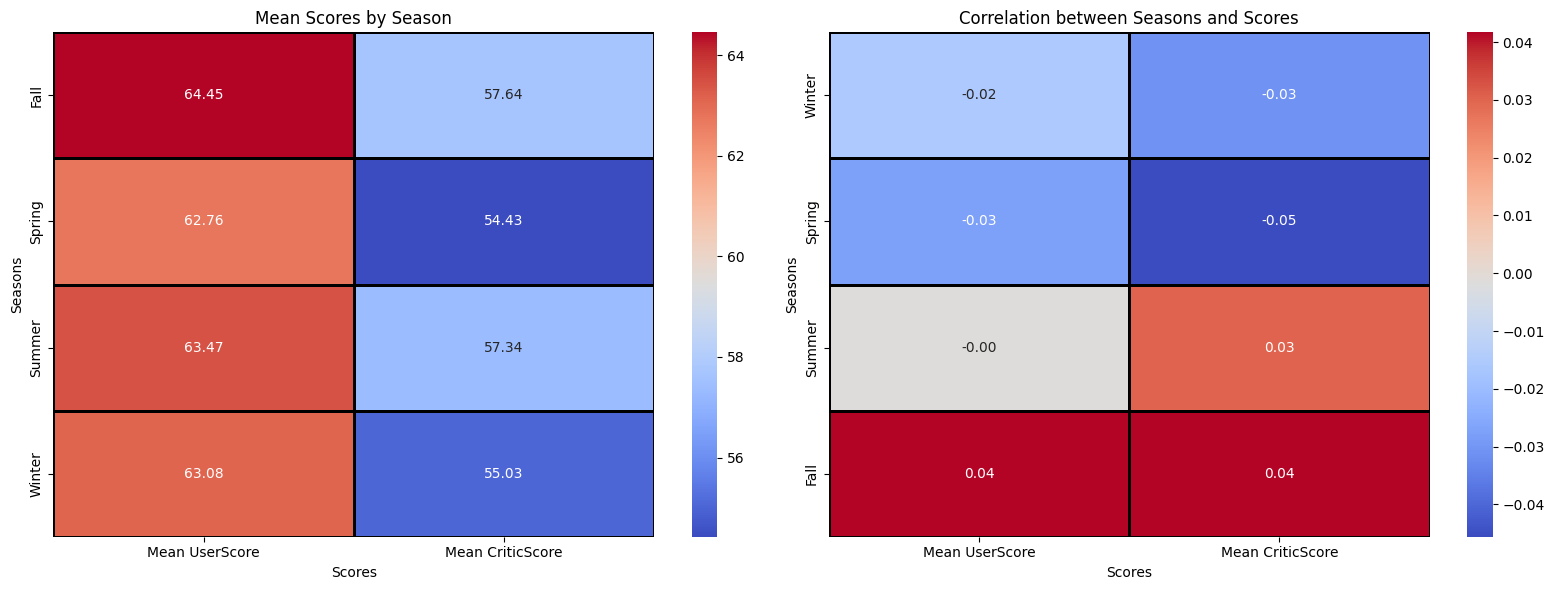

In [7]:

# Map months to seasons
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
data_q1['Season'] = data_q1['Release Month'].map(season_map)

# Define the columns for scores
scores_columns = ['Mean UserScore', 'Mean CriticScore']

# One-hot encode the seasons
season_dummies = pd.get_dummies(data_q1['Season'])

# Concatenate one-hot-encoded seasons and scores
correlation_data = pd.concat([data_q1[scores_columns], season_dummies], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations of seasons with scores
season_score_correlation = correlation_matrix.loc[
    ['Winter', 'Spring', 'Summer', 'Fall'], scores_columns
]

season_scores_means = data_q1.groupby('Season')[scores_columns].mean()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Left Plot: Mean Scores by Season
sns.heatmap(season_scores_means, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black', ax=ax[0])
ax[0].set_title('Mean Scores by Season')
ax[0].set_xlabel('Scores')
ax[0].set_ylabel('Seasons')

# Right Plot: Correlation between Seasons and Scores
sns.heatmap(season_score_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black', ax=ax[1])
ax[1].set_title('Correlation between Seasons and Scores')
ax[1].set_xlabel('Scores')
ax[1].set_ylabel('Seasons')

# Show the plot
plt.tight_layout()
plt.show()


1. Mean Scores by Season:

    - **Winter:** This season generally sees higher scores from both users and critics, suggesting that movies released during this time are often well-received.
    - **Spring:** Spring releases tend to have lower scores compared to other seasons.
    - **Summer and Fall:** These seasons show a moderate level of scores, with summer slightly edging out fall in terms of user ratings.
2. Correlation Between Seasons and Scores:

    - **Weak Correlations:** The correlations between seasons and scores are generally weak, indicating that seasonality alone does not strongly predict movie success.
    - **Slight Variations:** There are subtle variations in the correlations for user and critic scores across seasons. For instance, winter releases show a slightly stronger positive correlation with critic scores compared to user scores.

- Heatmap of correlation among all features

<Axes: >

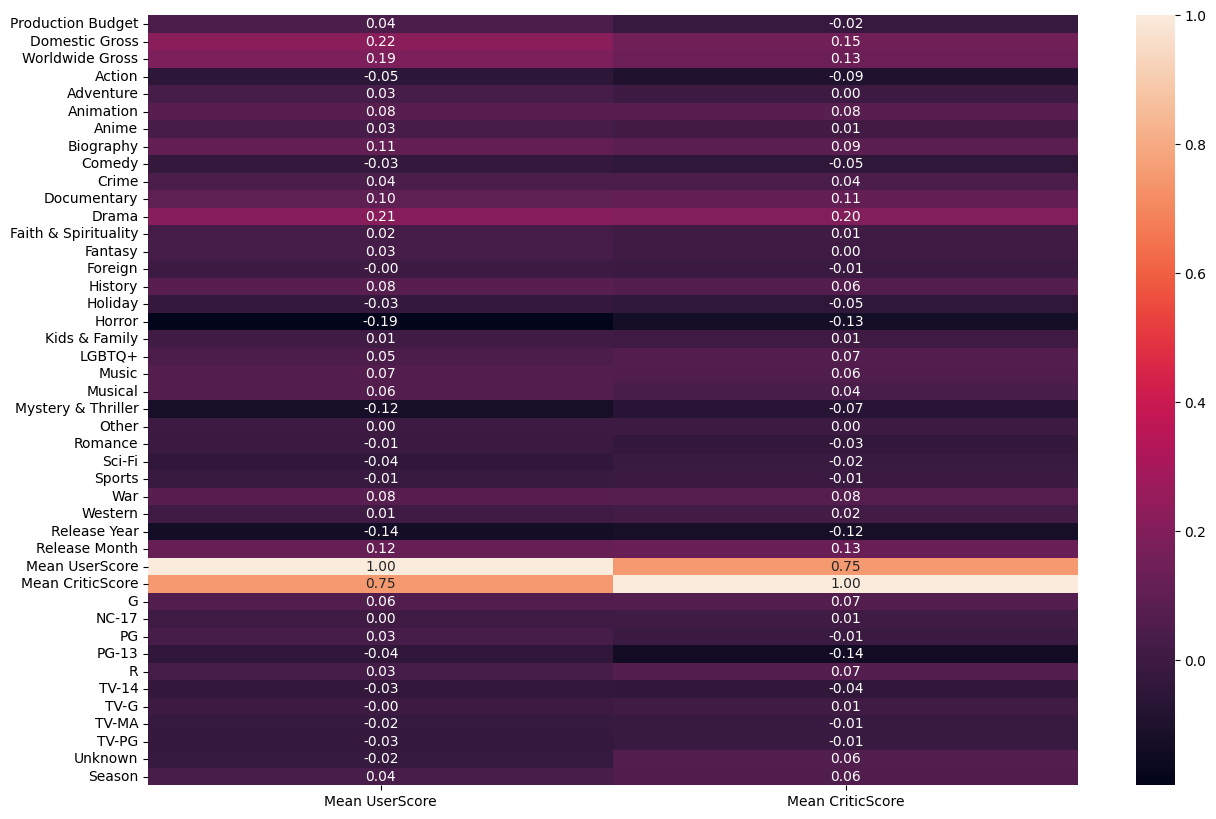

In [8]:
# Label encoding for the Season column
season_map = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}
data_q1['Season'] = data_q1['Season'].map(season_map)

plt.figure(figsize=(15, 10))
sns.heatmap(data_q1.corr()[['Mean UserScore', 'Mean CriticScore']], annot=True, fmt=".2f")

1. Surprisingly, **`UserScore`** and **`CriticScore`** show a really strong positive correlation, which may indicate that:
    - **Consistent Perception:** Movies that perform well with critics tend to be appreciated by users too, highlighting universal qualities like storytelling, acting, or production value.
    - **Mutual Influences:** High critic scores may influence user expectations, or user enthusiasm might validate critic assessments.

2. In terms of other features, as the heatmap aligns with the above analysises

<h3 id = "conclusion1">2.1.3 Conclusion </h3>

1. **Domestic and Worldwide Gross:**

    - Positive correlation with both Mean UserScore (0.22 and 0.19) and Mean CriticScore (0.15 and 0.13).
    - Suggests higher revenue movies are generally better received by both audiences and critics.

2. **Genre Influences:**

    - Drama shows a notable positive correlation with both Mean UserScore (0.21) and Mean CriticScore (0.20), indicating critical and audience preference for this genre.
    - Horror correlates negatively with both scores (-0.19 for Mean UserScore and -0.13 for Mean CriticScore), suggesting lower acceptance by critics and audiences.

3. **Production Budget:**

    - Weak positive correlation with Mean UserScore (0.04) and a slight negative correlation with Mean CriticScore (-0.02). Implies production budget alone doesn’t strongly influence scores.

4. **Seasonality:**
    - Slightly positive correlation for movies released in Fall with both scores (0.04), suggesting a seasonal preference, likely aligning with award season releases.

5. **Ratings:**
    - Movies rated R have a slight positive correlation with Mean CriticScore (0.07), suggesting critics tend to favor mature themes.
    - Ratings like PG-13 and PG show weak or negative correlations, indicating mixed reception for family-oriented films.

6. **Marketing Indicators:**
    - Release Month correlates positively with both scores (0.12 for Mean UserScore and 0.13 for Mean CriticScore), suggesting strategic release timing can enhance reception.

---
Conclusions:

- **Revenue and Genre are key factors:** Higher-grossing movies and specific genres like drama receive better scores.
- **Horror films** generally under-perform in both audience and critic ratings.
- **Older movies** have a nostalgic or critical edge in scoring.
- **Seasonal releases**, especially in **Fall**, tend to fare better critically and commercially.

&rarr; **Strategic release timing** and **effective marketing** are crucial for improving reception.

<h2 id = "question2"> 2.2 Question 2 </h2>

**A Question:** 
How do financial metrics like budget and gross revenue correlate with ratings?

**Answering this question will help us:**
- Understand the financial aspects of movie success and how they align with audience and critic perceptions.
- Determine whether investing in larger budgets leads to better reception or if profitability is independent of ratings.
- Assist studios in balancing budget allocations with expectations for critical and commercial success.


**How to answer:**
    
- This question aims to explore the relationship between a movie’s financial success and its ratings:
    - **Budget vs. Ratings:** Investigate if higher production budgets lead to better critic or user scores.
    - **Gross Revenue vs. Ratings:** Examine whether movies with higher box office earnings also receive higher scores.
    - **Profitability (Revenue-to-Budget Ratio):** Determine if movies that are more profitable have better reception.
    - **Variance Between Critics and Users:** Identify if financial success affects critic and user scores differently.


<h3 id = "preprocessing2">2.2.1 Preprocessing </h3>

<h3 id = "analysis2">2.2.2 Analysis </h3>

<h3 id = "conclusion2">2.2.3 Conclusion </h3>

<h2 id = "question3"> 2.3 Question 3 </h2>

**A Question:** 
What genres tend to perform better in terms of critic and user scores?

**Answering this question will help us:**
- Identify which genres are most likely to be critically acclaimed or popular with audiences.
- Provide insights into genre trends to inform production and marketing decisions.
- Understand differences in tastes between critics and audiences for specific genres



**How to answer:**
    
- This question focuses on genre-specific performance:
    - **Critic Preference:** Determine which genres are more favored by critics.
    - **User Preference:** Compare how user ratings differ from critic ratings for specific genres.
    - **Consistency:** Identify genres with consistently high scores across multiple movies.
    - **Cross-genre Analysis:** Explore if hybrid genres (e.g., sci-fi thrillers) tend to perform better than single-genre movies.


<h3 id = "preprocessing3">2.3.1 Preprocessing </h3>

<h3 id = "analysis3">2.3.2 Analysis </h3>

<h3 id = "conclusion3">2.3.3 Conclusion </h3>

<h2 id = "question4"> 2.4 Question 4 </h2>

**A Question:** 
Are there trends in movie production and performance over time?

**Answering this question will help us:**
- Explore how the movie industry has evolved, including changes in production values and audience preferences.
- Highlight patterns that can predict future trends in filmmaking and reception.
- Understand the impact of technological and cultural shifts on movie ratings and performance.



**How to answer:**
    
- This question examines the evolution of movies over years or decades:
    - **Rating Trends:** Analyze how average critic and user scores have changed over time.
    - **Genre Popularity:** Investigate shifts in the popularity of different genres.
    - **Production Costs:** Study changes in average budgets and their impact on ratings.
    - **Cultural and Social Trends:** Determine if societal changes influence movie themes and their reception.

<h3 id = "preprocessing4">2.4.1 Preprocessing </h3>

<h3 id = "analysis4">2.4.2 Analysis </h3>

<h3 id = "conclusion4">2.4.3 Conclusion </h3>

<h2 id = "question5"> 2.5 Question 5 </h2>

**A Question:** 
What is the trend of rating movies over time?

**Answering this question will help us:**
- Understand how societal and cultural factors have shaped age ratings over the decades.
- Identify patterns in how different genres are rated for audiences of various age groups.

**How to answer:**
    
- This question explores the temporal changes and influences on movie age ratings:
    - **Trends in Age Ratings:** Analyze whether movies have become more or less restricted over the years (e.g., shifts from G to PG-13 or R ratings).
    - **Era-Specific Patterns:** Identify periods with stricter or more lenient age-rating standards.
    - **Impact of Societal Norms:** Examine how changes in societal values and cultural sensitivity have influenced age ratings.
    - **Genre-Specific Ratings:** Investigate whether certain genres (e.g., action, horror) have seen shifts toward stricter or looser ratings over time.


<h3 id = "preprocessing5">2.5.1 Preprocessing </h3>

- First we will need to understand the meaning of each rating to have a more comprehensive view of rating system:
    1. **G:** General audiences – All ages admitted.
    2. **PG:** Parental guidance suggested – Some material may not be suitable for children.
    3. **PG-13:** Parents strongly cautioned – Some material may be inappropriate for children under 13.
    4. **R:** Restricted – Under 17 requires accompanying parent or adult guardian.
    5. **NC-17:** Adults only – No one 17 and under admitted.
    6. **TV-G:** Most parents will find this program suitable for all ages.
    7. **TV-PG:** This program contains material that parents may find unsuitable for younger children.
    8. **TV-MA:** This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
    9. **TV-14:** This program contains material that many parents would find unsuitable for children under 14 years of age.
    10. **Unknown:** This movie or program is not rated due to some reasons

- Secondly, we will need to see the number of movies' ratings over the time 
    - Using the binning method of 10 years to see the overall trend more generally (Because the number of years are too many from 1910 - 2020)

In [ ]:
# Number of movies per rating over the years
data_q5 = data.copy()

# Create column for release year
data_q5['Release Year'] = pd.to_datetime(data_q5['Release Date']).dt.year

# Create bin for release year
bin_age = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2024]
label_age = ['1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2024']
data_q5['Release Year Bin'] = pd.cut(data_q5['Release Year'], bins=bin_age, labels=label_age)

data_q5['Release Year Bin']

0       1990-1999
1       1970-1979
2       1940-1949
3       2010-2019
4       2020-2024
          ...    
5101    2010-2019
5102    2020-2024
5103    1990-1999
5104    2010-2019
5105    2020-2024
Name: Release Year Bin, Length: 5106, dtype: category
Categories (12, object): ['1910-1919' < '1920-1929' < '1930-1939' < '1940-1949' ... '1990-1999' < '2000-2009' < '2010-2019' < '2020-2024']

<h3 id = "analysis5">2.5.2 Analysis </h3>

- The distribution of rating over decades

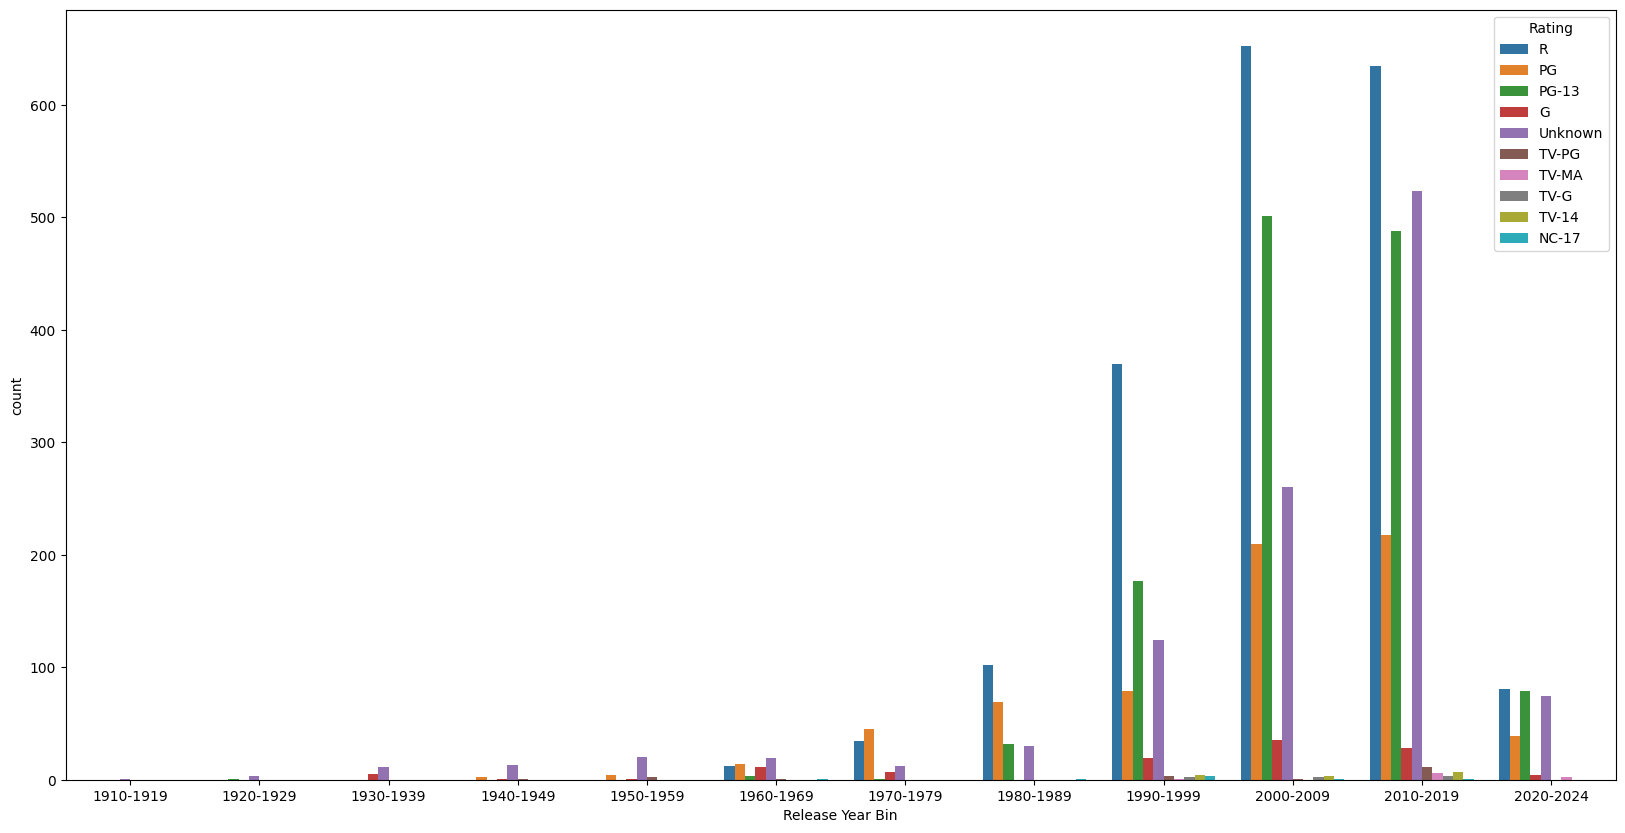

In [82]:
plt.figure(figsize=(20, 10))

ax = sns.countplot(data=data_q5, x='Release Year Bin', hue='Rating')


- Key observations:
    1. As can be seen from the count plot, before 1970, the **Unknown** rating was dominant, this is because:
        - The rating system didn't come out until the 1960's and even then it was a slow process to catch on. Some of the best non-rated films of any era were the made-for-tv movies from the 1970's, they got away with a lot of stuff and the writers and directors had a lot of creative freedom. Some non-rated theatrical release films are fantastic.
        - Reference: https://www.quora.com/Why-are-some-films-not-rated
    2. Except for period from 1970 - 1979, since MPAA rating system was introduced in 1968, which allowed filmmakers to address mature themes while still being accessible to broader audiences. PG ratings became a middle ground for films balancing family-friendliness with adult content, fueling their popularity.
        - Reference: https://s4screenplay.com/oblogatory/movies/why-are-old-pg-rated-movies-more-risque-than-todays/
    3. After 1980, there is a rise of **R**, **PG** and **PG-13** rated movies for these reasons:
        - The introduction of the PG-13 rating in 1984 provided a middle ground between PG and R ratings. This led to a decline in PG-rated movies, as many films previously rated PG were reclassified as PG-13.
        - R-rated movies saw a significant rise during this time, driven by the popularity of darker, more mature themes in genres like action, horror, and drama. Filmmakers increasingly targeted older audiences with more explicit content.
        - The dominance of PG-13 from the 1990s onward reflects the industry's focus on maximizing audience reach by creating films suitable for teenagers and adults without restricting younger viewers entirely. 
    4. Recent Trends (2000–2020):
        - PG-13 remained the most popular rating, balancing accessibility and mature content. This is particularly evident in major blockbuster franchises (e.g., Marvel, DC).
        - R-rated films continued to hold a steady share, driven by niche audiences and genres like horror and thrillers.
        - Family-friendly G-rated films declined, reflecting a shift in children's entertainment toward TV and streaming platforms rather than theatrical releases.

    5. 2020s Decline in All Ratings:
        - The sharp drop in movie counts across all ratings likely results from the COVID-19 pandemic, which disrupted movie production and theatrical releases during this period.
---
- Societal and Cultural Influences:
    1. Increasing cultural sensitivity and stricter rating standards likely led to fewer G-rated films over time.
    2. Shifts in societal norms and demand for inclusivity and realism may have driven the rise of PG-13 and R ratings.

<h3 id = "conclusion4">2.5.3 Conclusion </h3>